<a href="https://colab.research.google.com/github/R4ffz0/trabalho-estutura-de-dados/blob/main/timsort_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escolha a ordenação:
1 - Crescente
2 - Decrescente
Digite 1 ou 2: 1

Digite números separados por espaço:
1 2 3 4 5 6 7 8 9 19 28 18 17 16 15 14 13 12 11 10

Resultado da ordenação:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 28]

--- INICIANDO TESTE DE DESEMPENHO ---
Entrada 100: 0.157 ms
Entrada 1000: 1.798 ms
Entrada 10000: 26.422 ms
Entrada 100000: 620.397 ms

--- GERANDO GRÁFICO ---


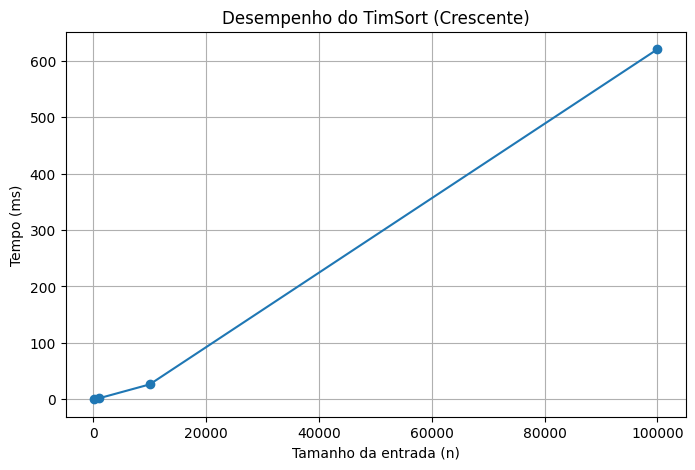

In [1]:
import random
import time
import matplotlib.pyplot as plt


RUN = 32

def insertion_sort(arr, left, right, reverse=False):
    for i in range(left + 1, right + 1):
        temp = arr[i]
        j = i - 1
        while j >= left and ((arr[j] > temp) != reverse):
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = temp


def merge(arr, l, m, r, reverse=False):
    left = arr[l:m+1]
    right = arr[m+1:r+1]

    i = j = 0
    k = l

    while i < len(left) and j < len(right):
        if (left[i] <= right[j]) != reverse:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1


def timsort(arr, reverse=False):
    n = len(arr)

    for i in range(0, n, RUN):
        insertion_sort(arr, i, min(i + RUN - 1, n - 1), reverse)

    size = RUN
    while size < n:
        for left in range(0, n, size * 2):
            mid = left + size - 1
            right = min(left + 2*size - 1, n - 1)

            if mid < right:
                merge(arr, left, mid, right, reverse)

        size *= 2
    return arr


def medir_tempos(tamanhos, reverse=False):
    tempos = []

    for n in tamanhos:
        dados = [random.randint(0, 10**6) for _ in range(n)]

        inicio = time.perf_counter()
        timsort(dados, reverse)
        fim = time.perf_counter()

        tempo_ms = (fim - inicio) * 1000
        tempos.append(tempo_ms)

        print(f"Entrada {n}: {tempo_ms:.3f} ms")

    return tempos


def gerar_grafico(tamanhos, tempos, reverse):
    ordem = "Crescente" if not reverse else "Decrescente"

    plt.figure(figsize=(8,5))
    plt.plot(tamanhos, tempos, marker="o")
    plt.title(f"Desempenho do TimSort ({ordem})")
    plt.xlabel("Tamanho da entrada (n)")
    plt.ylabel("Tempo (ms)")
    plt.grid(True)
    plt.show()


def ordenar_usuario(reverse=False):
    print("\nDigite números separados por espaço:")
    lista = list(map(int, input().split()))

    resultado = timsort(lista, reverse)

    print("\nResultado da ordenação:")
    print(resultado)


def main():
    print("Escolha a ordenação:")
    print("1 - Crescente")
    print("2 - Decrescente")
    escolha = input("Digite 1 ou 2: ")

    reverse = (escolha == "2")

    ordenar_usuario(reverse)

    tamanhos = [100, 1000, 10000, 100000]

    print("\n--- INICIANDO TESTE DE DESEMPENHO ---")
    tempos = medir_tempos(tamanhos, reverse)

    print("\n--- GERANDO GRÁFICO ---")
    gerar_grafico(tamanhos, tempos, reverse)


main()
